In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zad


Dla poniższych danych 

 * znajdż optymalną ilość wymiaów i zredukuj wymiar danyc
 * ponadto zmniejsz wymiar danych do 2 i zwizualizuj dane

In [3]:
samples = pd.read_csv("datasets/fish.csv", sep=";",decimal=",")
samples.head()


Weight  Length1  Length2  Length3  Height  Width  Species
0   242.0     23.2     25.4     30.0    38.4   13.4        1
1   290.0     24.0     26.3     31.2    40.0   13.8        1
2   340.0     23.9     26.5     31.1    39.8   15.1        1
3   363.0     26.3     29.0     33.5    38.0   13.3        1
4   430.0     26.5     29.0     34.0    36.6   15.1        1

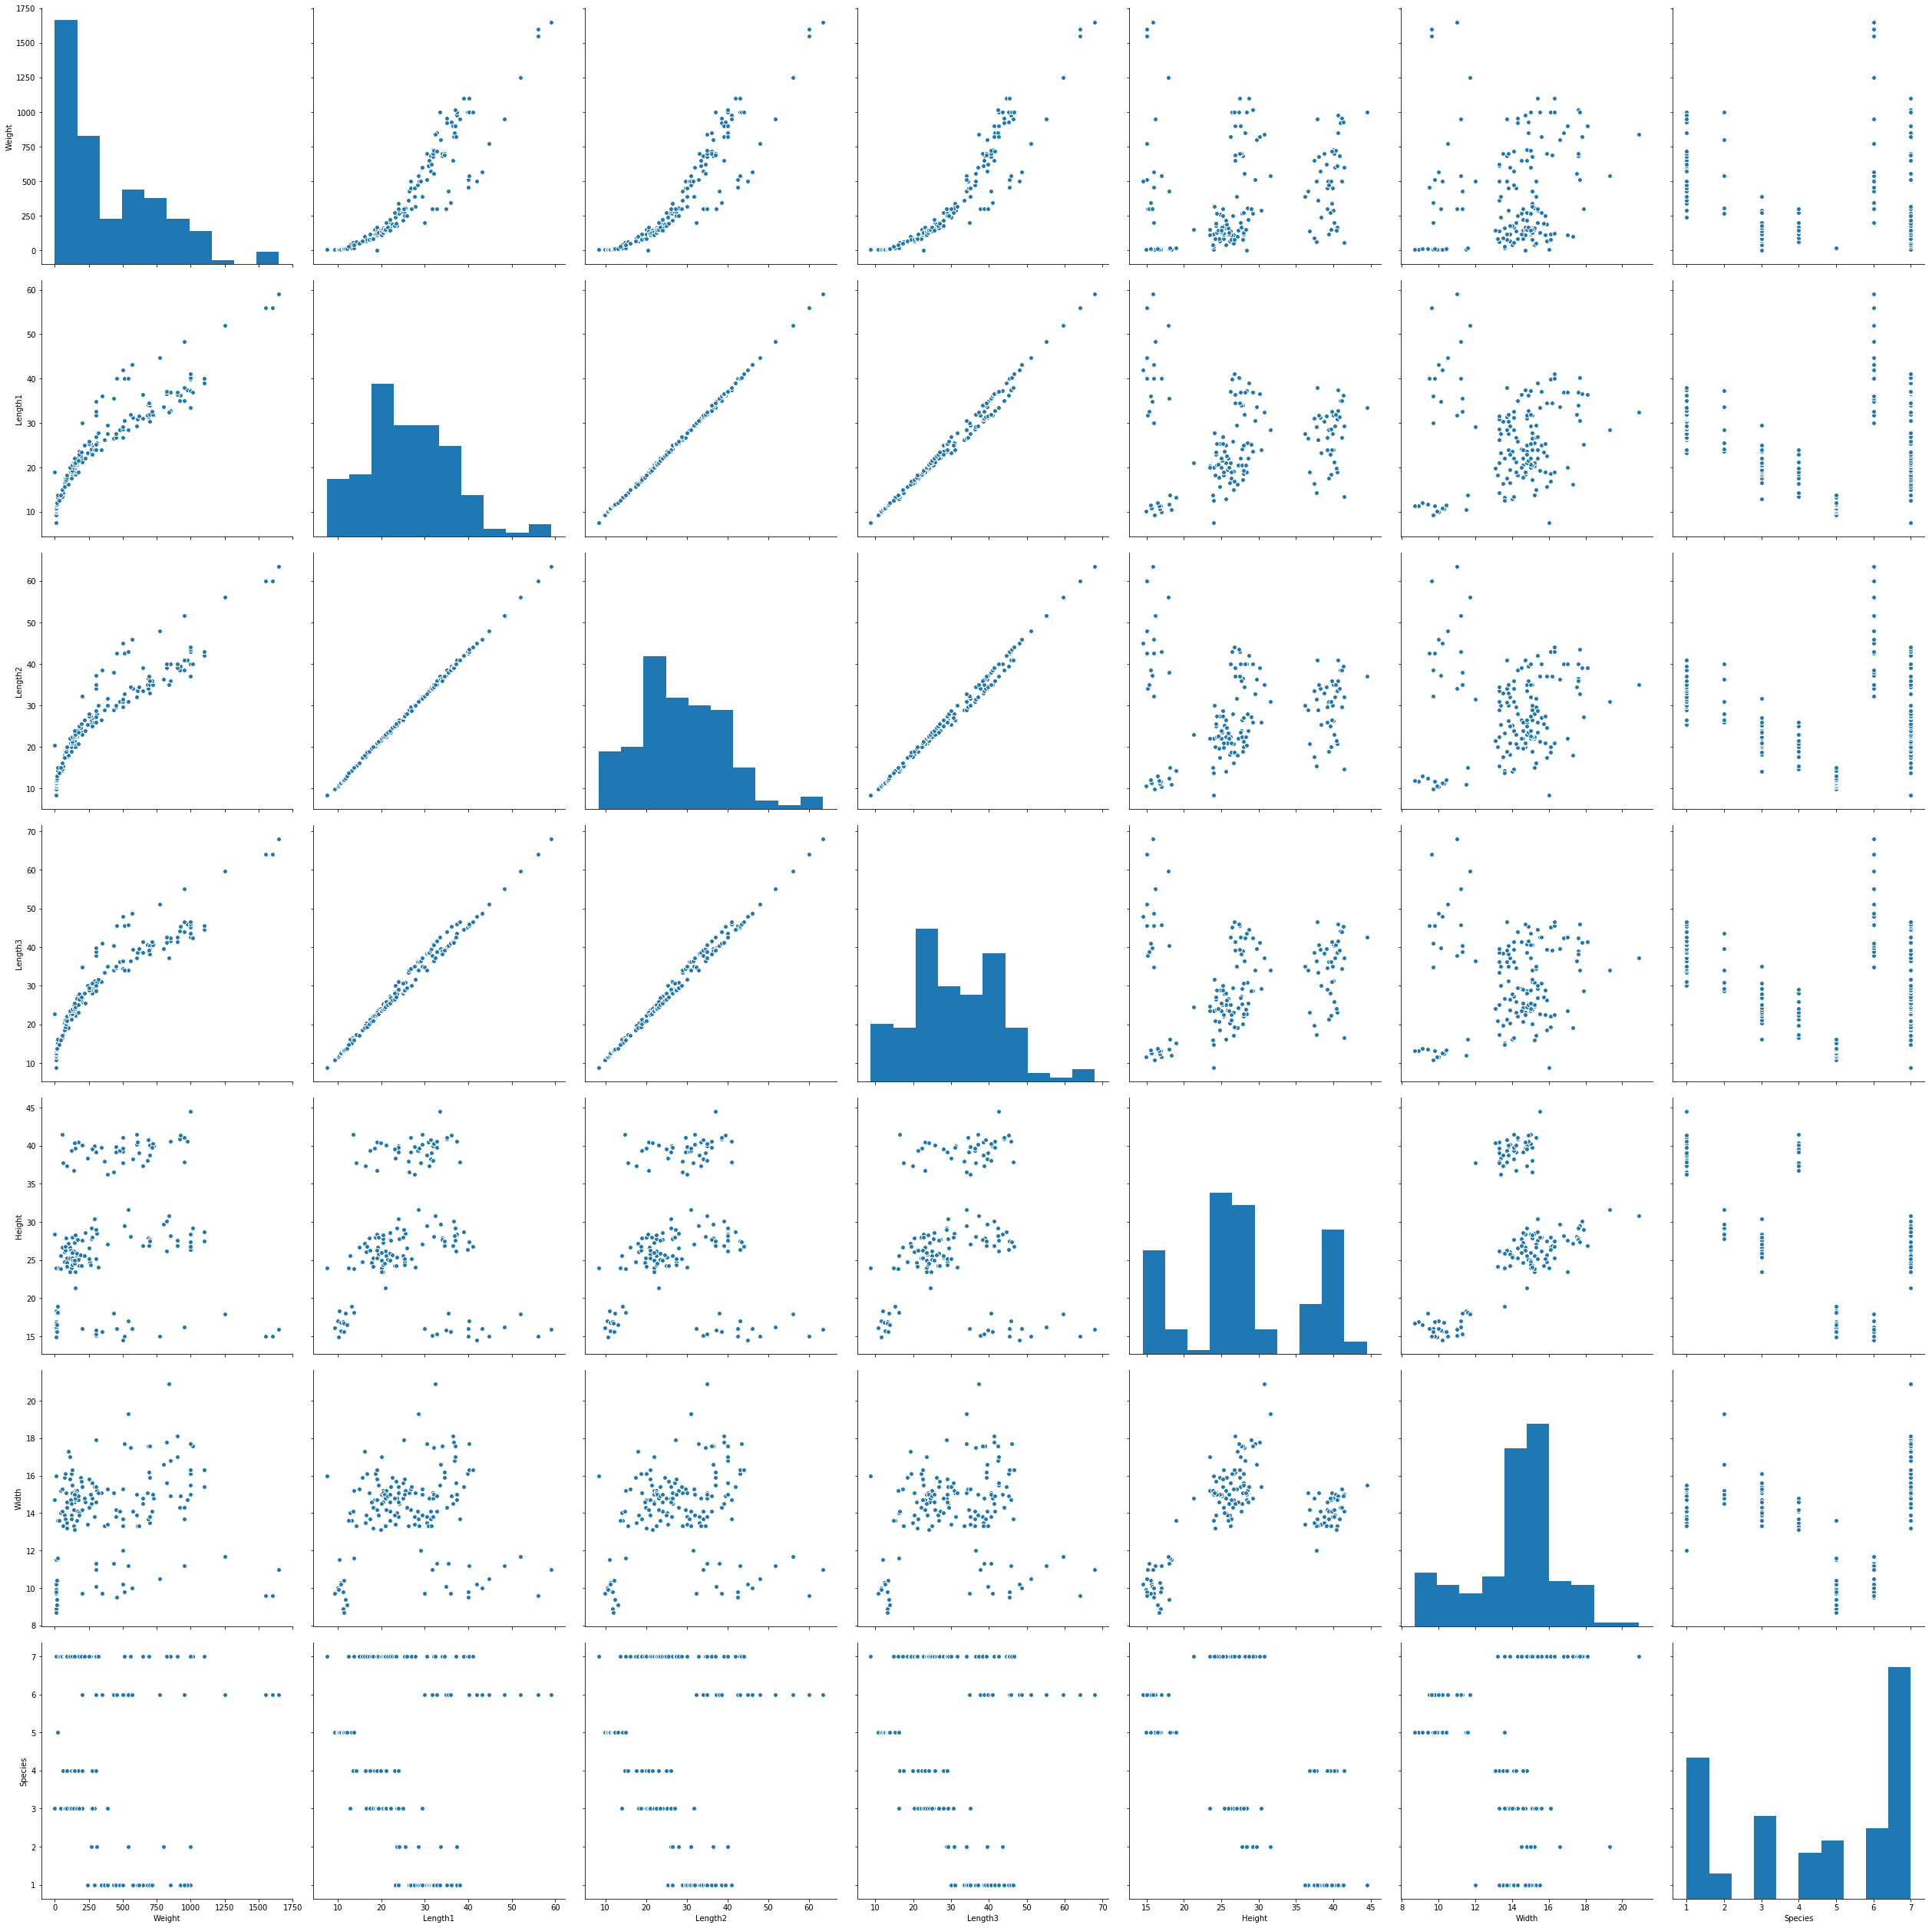

In [61]:
sns.pairplot(data=samples, size=5)
plt.show()

In [4]:
y = samples["Species"].values
X = samples.drop(["Species"],1).values

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

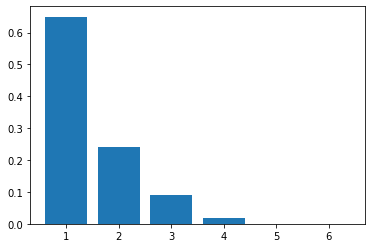

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_std)
plt.bar(range(1,1+pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [8]:
pca.components_.shape

(6, 6)

In [37]:
pca.explained_variance_ratio_

array([9.99034536e-01, 6.01408039e-04, 3.29292352e-04, 3.23471289e-05,
       2.21361670e-06, 2.02925028e-07])

## Odpowiedź: 3 wymiary są wystarczające

# Zad
Zwizualizuj dane w 2D

In [9]:
pca_2 = PCA(2)
X_std_2 = pca_2.fit_transform(X_std)

In [12]:
pca_2.components_.shape

(2, 6)

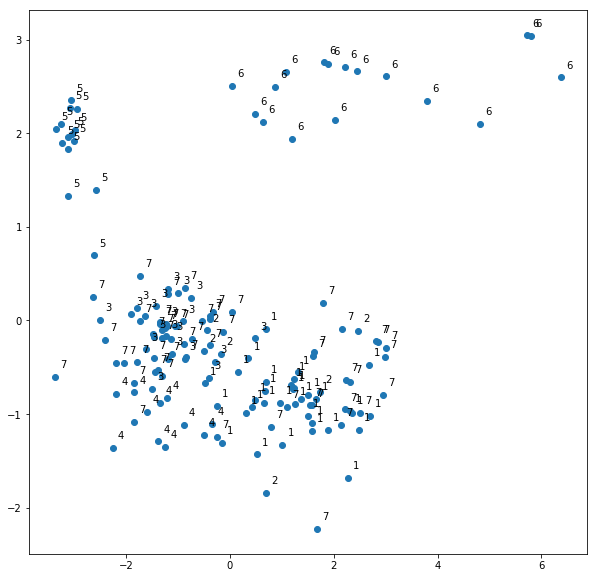

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(X_std_2[:,0],X_std_2[:,1])#, c = y)
for i in range(X_std_2.shape[0]):
    plt.annotate(y[i],xy=(X_std_2[i,0],X_std_2[i,1]), xytext = (X_std_2[i,0]+0.1,X_std_2[i,1]+0.1))
plt.show()

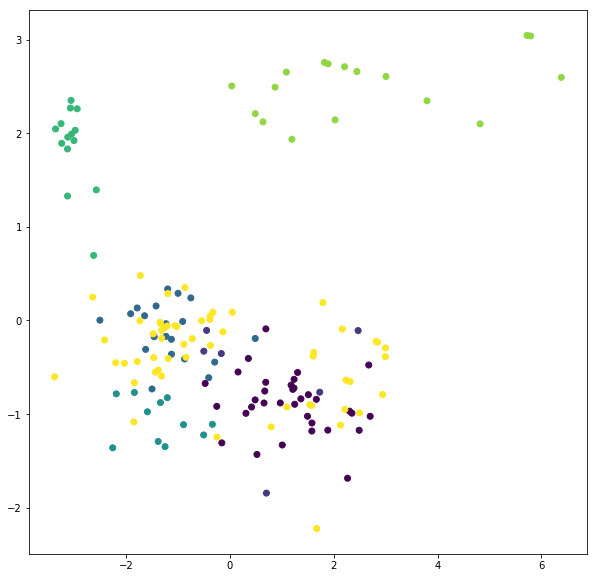

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(X_std_2[:,0],X_std_2[:,1], c = y)
plt.show()